In [1]:
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression

In [3]:
dataset = 'cr_loan_w2.csv'
df = pd.read_csv(dataset)


In [11]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_columns', 27)

In [12]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
count,29459.000000,2.945900e+04,29459.000000,29459.000000,29459.000000,29459.00000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000,29459.000000
mean,27.700058,6.580373e+04,4.758410,9583.600937,11.011529,0.21939,0.170111,5.788078,0.411385,0.003191,0.079976,0.505448,0.159646,0.198649,0.111681,0.185037,0.170135,0.174853,0.331749,0.318850,0.197766,0.112461,0.029906,0.007264,0.002003,0.823076,0.176924
std,6.165415,5.133110e+04,3.980653,6314.421006,3.240497,0.41384,0.106849,4.030672,0.492093,0.056399,0.271260,0.499979,0.366283,0.398990,0.314978,0.388334,0.375758,0.379848,0.470849,0.466039,0.398322,0.315939,0.170331,0.084922,0.044708,0.381611,0.381611
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.00000,0.090000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.00000,0.150000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,30.000000,7.905000e+04,7.000000,12250.000000,13.470000,0.00000,0.230000,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,84.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.00000,0.830000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
features = [feature for feature in df]
features = features[:-2]

In [19]:
features

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_status',
 'loan_percent_income',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OTHER',
 'person_home_ownership_OWN',
 'person_home_ownership_RENT',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_PERSONAL',
 'loan_intent_VENTURE',
 'loan_grade_A',
 'loan_grade_B',
 'loan_grade_C',
 'loan_grade_D',
 'loan_grade_E',
 'loan_grade_F',
 'loan_grade_G']

In [20]:
df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,21,9600,5,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,25,9600,1,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,23,65500,4,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,24,54400,8,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,21,9900,2,2500,7.14,1,0.25,2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29454,57,53000,1,5800,13.16,0,0.11,30,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
29455,54,120000,4,17625,7.49,0,0.15,19,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
29456,65,76000,3,35000,10.99,1,0.46,28,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
29457,56,150000,5,15000,11.48,0,0.10,26,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0


In [21]:
X = df[features]
Y = df['cb_person_default_on_file_Y']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 42, test_size = 0.2, shuffle = True)

In [27]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [28]:
Y_pred = model.predict(X_test)

In [29]:
# import metrics
from sklearn import metrics

In [30]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.8251866938221317


In [32]:
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[4571,  302],
       [ 728,  291]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

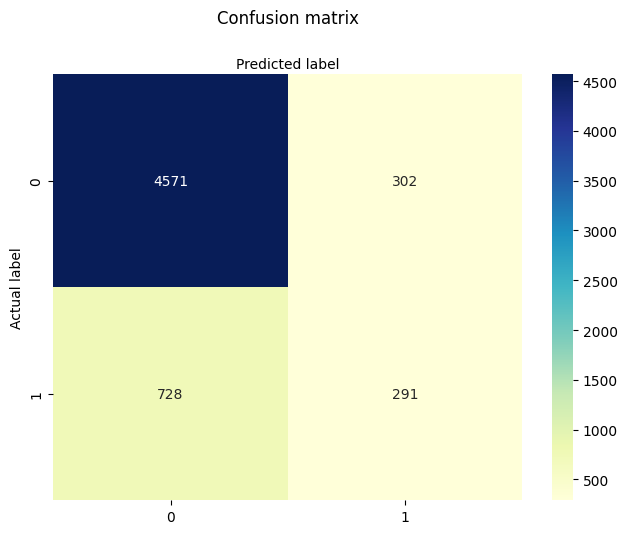

In [34]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [39]:
from sklearn.metrics import classification_report
target_names = ['not default', 'default']
print(classification_report(Y_test, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

 not default       0.86      0.94      0.90      4873
     default       0.49      0.29      0.36      1019

    accuracy                           0.83      5892
   macro avg       0.68      0.61      0.63      5892
weighted avg       0.80      0.83      0.81      5892



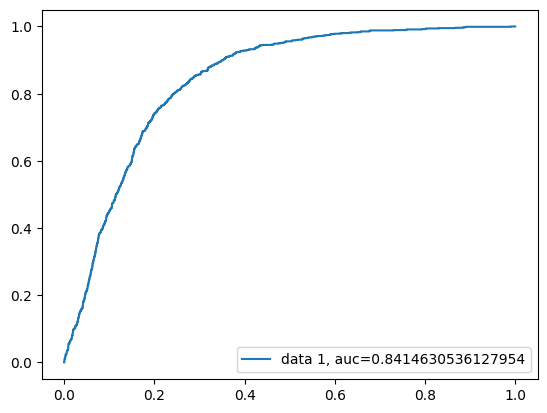

In [40]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()